In [28]:
import pixellib
from pixellib.semantic import semantic_segmentation
import cv2
#from wincap import WindowCapture #
from time import sleep;
import re


In [2]:
frame = cv2.imread("images/hostel2.jpg")# cap.open("tcp://192.168.100.56:8888")
segment_video = semantic_segmentation()

In [3]:
# segment_video.process_camera_ade20k(cap, overlay=True, frames_per_second= 15, output_video_name="output_video.mp4", show_frames= True,
# frame_name= "Segmentation")
segment_video.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

In [4]:
segvalues, extracted_objects, new_frame= segment_video.segmentFrameAsAde20k(frame, output_frame_name="segmentation",overlay=False, verbose =True, extract_segmented_objects = True) 

In [5]:
new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [6]:
new_frame[600][600]
new_frame.shape

(602, 671, 3)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time

color = [6,230,230]
mask = np.zeros_like(new_frame, dtype = float)
np.isfinite(new_frame, out = mask, where = new_frame == color) ## 
mask = mask[:,:,0]

In [19]:
mask[0][0]

0.0

In [40]:
## Inefficient, O(N^2)
def findpath(mask):
   midpoints=[]
   for i in range(mask.shape[0]):    ## specifying starting and ending rows
        row_measure=[0,0]  # i[start,end]
        measure=0
        max_measure=0 
        start=0
        for j in range(1,mask.shape[1]-1):
            if(measure==0):
                if(j<(mask.shape[1]-1) and mask[i][j]==1 and mask[i][j+1]==1):
                   measure+=1
                   start=j
            if(measure!=0):
                if(mask[i][j]==1 and mask[i][j+1]==1):
                    measure+=1
                    if(measure>max_measure and measure>40 and j>(mask.shape[1]-20)):
                            row_measure = [start,j]
                            max_measure=measure
                            measure=0;
                elif(measure>max_measure and measure>40):
                        row_measure = [start,j]
                        max_measure=measure
                        measure=0;
        midpoints.append(row_measure)

   return midpoints

In [42]:
# Efficient, O(N)
def findpath(mask):
   midpoints=[]
   for i in range(mask.shape[0]):    ## specifying starting and ending rows
        row_measure=[0,0]  # i[start,end]
        measure=0
        max_measure=0 
        start=0
        check = "".join(str(int(x)) for x in mask[i])
        if (len(re.findall(r'[1]+',str(check)))!=0):
          res = max(re.findall(r'[1]+',str(check)),key=len)
          start = check.index(res)
          end = start+len(res)
          row_measure = [start,end]
        midpoints.append(row_measure)

   return midpoints

In [43]:
midpoints = findpath(mask)

In [44]:
x=[]
y=[]
for i in range(len(midpoints)):
    y.append(i)
    x.append((midpoints[i][0]+midpoints[i][1])//2)

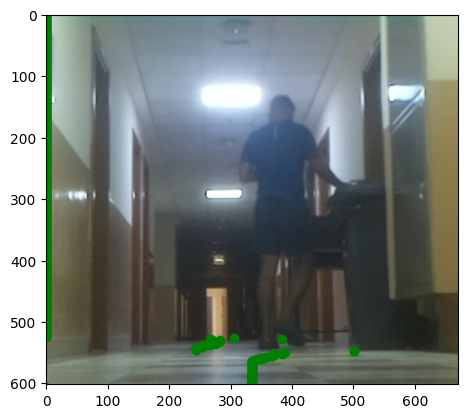

In [45]:
plt.scatter(x,y,color='g')
plt.imshow(frame)

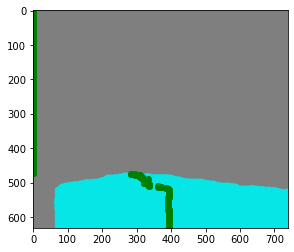

In [39]:
plt.scatter(x,y,color='g')
plt.imshow(new_frame)

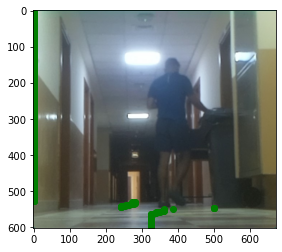

In [49]:
plt.scatter(x,y,color='g')
plt.imshow(frame)

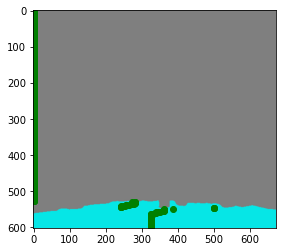

In [50]:
plt.scatter(x,y,color='g')
plt.imshow(new_frame)